In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

***Calculate lepinski descriptors***




Evaluating the druglikeness of the molecule, based on the pharmacokinetic profile or (ADME), following the rule of 5:

    Molecular weight < 500 Dalton
    Octanol-water partition
    coefficient (LogP) < 5
    Hydrogen bond donors < 5
    Hydrogen bond acceptors < 10

In [5]:
df = pd.read_csv('Compounds.csv')
df

,mol_chembl_id,canonical_smiles,bioactivity,standard_value
0,CHEMBL415967,O=P(O)(O)C(Cc1ccc2ccccc2c1)N[C@@H](Cc1ccc(-c2c...,active,6.9
1,CHEMBL418704,O=P(O)(O)C(Cc1ccccc1)N[C@H](Cc1ccc(-c2ccccc2)c...,active,17.0
2,CHEMBL10251,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@@H](Cc1ccc(-c2c...,active,4.8
3,CHEMBL9963,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@H](Cc1ccc(-c2cc...,active,8.8
4,CHEMBL276690,O=P(O)(O)C(Cc1cccc2c1OCO2)N[C@@H](Cc1ccc(-c2cc...,active,0.7
...,...,...,...,...
427,CHEMBL51576,O=C(O)CN1Cc2ccccc2C[C@H](NC(=O)[C@@H](S)Cc2ccc...,active,175.0
428,CHEMBL299639,O=C(O)CN1C(=O)[C@@H](NC(=O)[C@@H](S)Cc2ccccc2)...,active,6.1
429,CHEMBL287896,C[C@H](NC(=O)[C@@H](S)Cc1ccccc1)C(=O)N1CCC[C@H...,active,400.0
430,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,3.9


In [6]:
df.standard_value.describe()

count       432.000000
mean      16727.466412
std       50961.658141
min           0.030000
25%           8.600000
50%         212.500000
75%        4352.000000
max      830000.000000
Name: standard_value, dtype: float64

***calculate molecular descriptors***

In [7]:
#Custom function from: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,499.511,4.6398,4.0,5.0
1,449.451,3.4866,4.0,5.0
2,499.511,4.6398,4.0,5.0
3,499.511,4.6398,4.0,5.0
4,493.460,3.2153,4.0,7.0
...,...,...,...,...
427,398.484,1.6818,3.0,4.0
428,398.484,2.0763,3.0,4.0
429,350.440,1.1078,3.0,4.0
430,426.538,2.3179,3.0,4.0


[logP = solubility],
[NumHDonors = hydrogen bound donors],
[NumHAcceptors = hydrogen bound acceptors],

***Combining dataframes***

In [9]:
df_comb = pd.concat([df,df_lipinski],axis=1)
df_comb

,mol_chembl_id,canonical_smiles,bioactivity,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL415967,O=P(O)(O)C(Cc1ccc2ccccc2c1)N[C@@H](Cc1ccc(-c2c...,active,6.9,499.511,4.6398,4.0,5.0
1,CHEMBL418704,O=P(O)(O)C(Cc1ccccc1)N[C@H](Cc1ccc(-c2ccccc2)c...,active,17.0,449.451,3.4866,4.0,5.0
2,CHEMBL10251,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@@H](Cc1ccc(-c2c...,active,4.8,499.511,4.6398,4.0,5.0
3,CHEMBL9963,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@H](Cc1ccc(-c2cc...,active,8.8,499.511,4.6398,4.0,5.0
4,CHEMBL276690,O=P(O)(O)C(Cc1cccc2c1OCO2)N[C@@H](Cc1ccc(-c2cc...,active,0.7,493.460,3.2153,4.0,7.0
...,...,...,...,...,...,...,...,...
427,CHEMBL51576,O=C(O)CN1Cc2ccccc2C[C@H](NC(=O)[C@@H](S)Cc2ccc...,active,175.0,398.484,1.6818,3.0,4.0
428,CHEMBL299639,O=C(O)CN1C(=O)[C@@H](NC(=O)[C@@H](S)Cc2ccccc2)...,active,6.1,398.484,2.0763,3.0,4.0
429,CHEMBL287896,C[C@H](NC(=O)[C@@H](S)Cc1ccccc1)C(=O)N1CCC[C@H...,active,400.0,350.440,1.1078,3.0,4.0
430,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,3.9,426.538,2.3179,3.0,4.0


***Convert IC50 to pIC50***

In [10]:
#We need to apply negative-logarithmic transformation to make an formly distribution 


def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis=1)
        
    return x
     
    

In [11]:
df = pIC50(df_comb)
df

,mol_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL415967,O=P(O)(O)C(Cc1ccc2ccccc2c1)N[C@@H](Cc1ccc(-c2c...,active,499.511,4.6398,4.0,5.0,8.161151
1,CHEMBL418704,O=P(O)(O)C(Cc1ccccc1)N[C@H](Cc1ccc(-c2ccccc2)c...,active,449.451,3.4866,4.0,5.0,7.769551
2,CHEMBL10251,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@@H](Cc1ccc(-c2c...,active,499.511,4.6398,4.0,5.0,8.318759
3,CHEMBL9963,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@H](Cc1ccc(-c2cc...,active,499.511,4.6398,4.0,5.0,8.055517
4,CHEMBL276690,O=P(O)(O)C(Cc1cccc2c1OCO2)N[C@@H](Cc1ccc(-c2cc...,active,493.460,3.2153,4.0,7.0,9.154902
...,...,...,...,...,...,...,...,...
427,CHEMBL51576,O=C(O)CN1Cc2ccccc2C[C@H](NC(=O)[C@@H](S)Cc2ccc...,active,398.484,1.6818,3.0,4.0,6.756962
428,CHEMBL299639,O=C(O)CN1C(=O)[C@@H](NC(=O)[C@@H](S)Cc2ccccc2)...,active,398.484,2.0763,3.0,4.0,8.214670
429,CHEMBL287896,C[C@H](NC(=O)[C@@H](S)Cc1ccccc1)C(=O)N1CCC[C@H...,active,350.440,1.1078,3.0,4.0,6.397940
430,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,426.538,2.3179,3.0,4.0,8.408935


In [12]:
df.pIC50.describe()

count    432.000000
mean       6.650141
std        1.651124
min        3.080922
25%        5.362258
50%        6.672642
75%        8.065865
max       10.522879
Name: pIC50, dtype: float64

***Remove the Intermediate bioactivity***

In [13]:
df_active_inactive = df[df['bioactivity'] != 'Intermediate']
df_active_inactive

,mol_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL415967,O=P(O)(O)C(Cc1ccc2ccccc2c1)N[C@@H](Cc1ccc(-c2c...,active,499.511,4.6398,4.0,5.0,8.161151
1,CHEMBL418704,O=P(O)(O)C(Cc1ccccc1)N[C@H](Cc1ccc(-c2ccccc2)c...,active,449.451,3.4866,4.0,5.0,7.769551
2,CHEMBL10251,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@@H](Cc1ccc(-c2c...,active,499.511,4.6398,4.0,5.0,8.318759
3,CHEMBL9963,O=P(O)(O)C(Cc1cccc2ccccc12)N[C@H](Cc1ccc(-c2cc...,active,499.511,4.6398,4.0,5.0,8.055517
4,CHEMBL276690,O=P(O)(O)C(Cc1cccc2c1OCO2)N[C@@H](Cc1ccc(-c2cc...,active,493.460,3.2153,4.0,7.0,9.154902
...,...,...,...,...,...,...,...,...
427,CHEMBL51576,O=C(O)CN1Cc2ccccc2C[C@H](NC(=O)[C@@H](S)Cc2ccc...,active,398.484,1.6818,3.0,4.0,6.756962
428,CHEMBL299639,O=C(O)CN1C(=O)[C@@H](NC(=O)[C@@H](S)Cc2ccccc2)...,active,398.484,2.0763,3.0,4.0,8.214670
429,CHEMBL287896,C[C@H](NC(=O)[C@@H](S)Cc1ccccc1)C(=O)N1CCC[C@H...,active,350.440,1.1078,3.0,4.0,6.397940
430,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,426.538,2.3179,3.0,4.0,8.408935


In [13]:
df_active_inactive.to_csv('df_pIC50.csv', index=0)

***Chemical space analysis***

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')

***Frequency plot***

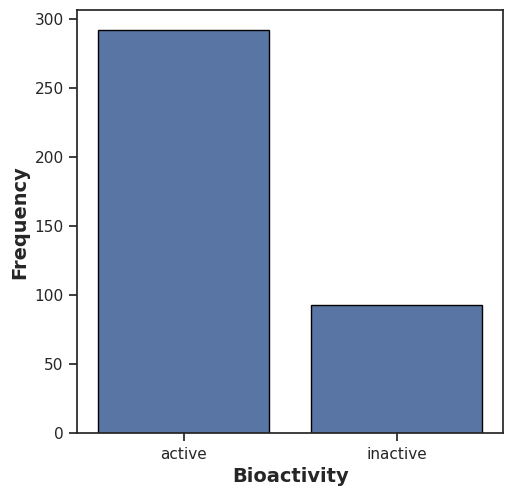

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity', data=df_active_inactive, edgecolor='black')

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

***Scatter plot of MW (moleculare weight) vs LogP (solubility)***

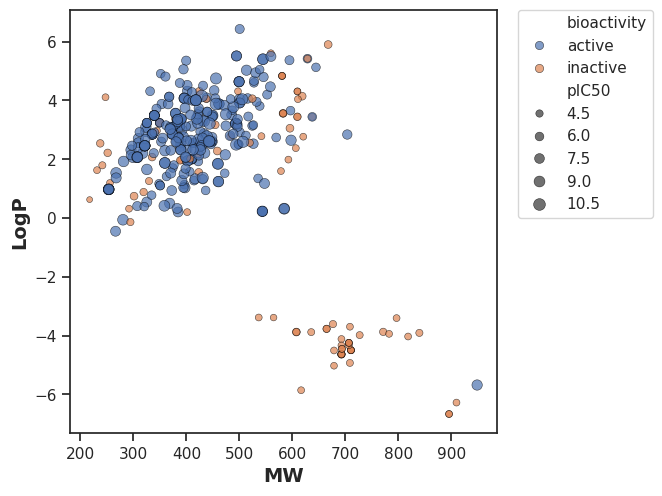

In [16]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_active_inactive, hue='bioactivity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

***Box plot***

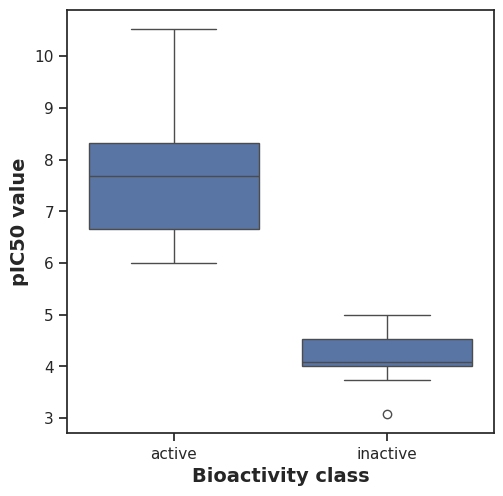

In [17]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity', y = 'pIC50', data = df_active_inactive)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

***Mann-Whitney U test***

In [18]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity']
  df = df_active_inactive[selection]
  active = df[df.bioactivity == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity']
  df = df_active_inactive[selection]
  inactive = df[df.bioactivity == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [19]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,27156.0,6.947819e-48,0.05,Different distribution (reject H0)
